# Carmi and John Go for a Walk

*An exploration of movie data using SQL*

We begin by importing all the requisite libraries and setting up the MySQL connection.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
%matplotlib inline

conn = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

## Release Month

*What is the impact of release month on box office sales?*

Which release month makes the most at the box office?

Text(0, 0.5, 'Worldwide Gross')

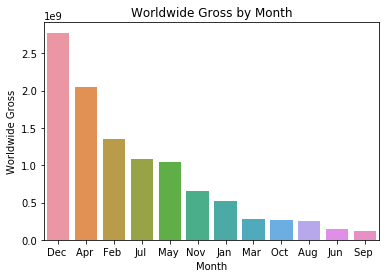

In [4]:
df = pd.read_sql_query('''
    SELECT SUBSTRING(release_date, 1, 4) AS release_month,
           count(id) AS movies_released,
           CAST(REPLACE(REPLACE(production_budget, '$', ''), ',' ,'') AS UNSIGNED) AS productionBudget, 
           CAST(REPLACE(REPLACE(worldwide_gross, '$', ''), ',' ,'') AS UNSIGNED) AS worldwideGross,
           CAST(REPLACE(REPLACE(domestic_gross, '$', ''), ',' ,'') AS UNSIGNED) AS domesticGross,
           CAST(REPLACE(REPLACE(worldwide_gross, '$', ''), ',' ,'') AS UNSIGNED) - CAST(REPLACE(REPLACE(domestic_gross, '$', ''), ',' ,'') AS UNSIGNED) AS internationalGross,
           CAST(REPLACE(REPLACE(worldwide_gross, '$', ''), ',' ,'') AS UNSIGNED) / count(id) AS gross_per_movie
           -- CAST(REPLACE(REPLACE(worldwide_gross, '$', ''), ',' ,'') AS UNSIGNED) - CAST(REPLACE(REPLACE(production_budget, '$', ''), ',' ,'') AS UNSIGNED) AS profit
    FROM tn_movie_budgets
    GROUP BY release_month
    ORDER BY worldwideGross DESC
''', conn)

sns.barplot(x=df['release_month'], y=df['worldwideGross'])
plt.title("Worldwide Gross by Month")
plt.xlabel("Month")
plt.ylabel("Worldwide Gross")

December-released movies make the most money by far, followed by April and then February. This makes sense given the winter holiday season in December, the spring holiday season in April, and Valentine's Day in February.

Does the answer change if we examine box office results on a per-movie basis?

Text(0, 0.5, 'Worldwide Gross per Movie')

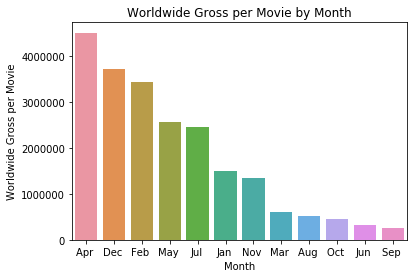

In [5]:
df = pd.read_sql_query('''
    SELECT SUBSTRING(release_date, 1, 4) AS release_month,
           count(id) AS movies_released,
           CAST(REPLACE(REPLACE(production_budget, '$', ''), ',' ,'') AS UNSIGNED) AS productionBudget, 
           CAST(REPLACE(REPLACE(worldwide_gross, '$', ''), ',' ,'') AS UNSIGNED) AS worldwideGross,
           CAST(REPLACE(REPLACE(domestic_gross, '$', ''), ',' ,'') AS UNSIGNED) AS domesticGross,
           CAST(REPLACE(REPLACE(worldwide_gross, '$', ''), ',' ,'') AS UNSIGNED) - CAST(REPLACE(REPLACE(domestic_gross, '$', ''), ',' ,'') AS UNSIGNED) AS internationalGross,
           CAST(REPLACE(REPLACE(worldwide_gross, '$', ''), ',' ,'') AS UNSIGNED) / count(id) AS gross_per_movie
           -- CAST(REPLACE(REPLACE(worldwide_gross, '$', ''), ',' ,'') AS UNSIGNED) - CAST(REPLACE(REPLACE(production_budget, '$', ''), ',' ,'') AS UNSIGNED) AS profit
    FROM tn_movie_budgets
    GROUP BY release_month
    ORDER BY gross_per_movie DESC
''', conn)

sns.barplot(x=df['release_month'], y=df['gross_per_movie'])
plt.title("Worldwide Gross per Movie by Month")
plt.xlabel("Month")
plt.ylabel("Worldwide Gross per Movie")

In fact, April, December, and February retain their top spots as having the highest grossing movies on a per-movie basis.